<a href="https://colab.research.google.com/github/sandesh20lamichhane/DeepLearning_Pytorch/blob/main/Digits_ClassificationANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/30] | Train Acc: 43.22% | Val Acc: 75.00%
Epoch [2/30] | Train Acc: 75.43% | Val Acc: 83.33%
Epoch [3/30] | Train Acc: 84.55% | Val Acc: 91.11%
Epoch [4/30] | Train Acc: 90.47% | Val Acc: 92.50%
Epoch [5/30] | Train Acc: 91.51% | Val Acc: 93.89%
Epoch [6/30] | Train Acc: 94.43% | Val Acc: 94.72%
Epoch [7/30] | Train Acc: 95.82% | Val Acc: 95.28%
Epoch [8/30] | Train Acc: 95.69% | Val Acc: 95.28%
Epoch [9/30] | Train Acc: 97.56% | Val Acc: 95.56%
Epoch [10/30] | Train Acc: 97.77% | Val Acc: 95.56%
Epoch [11/30] | Train Acc: 97.70% | Val Acc: 95.83%
Epoch [12/30] | Train Acc: 98.12% | Val Acc: 95.83%
Epoch [13/30] | Train Acc: 97.98% | Val Acc: 95.83%
Epoch [14/30] | Train Acc: 98.40% | Val Acc: 96.39%
Epoch [15/30] | Train Acc: 98.89% | Val Acc: 96.67%
Epoch [16/30] | Train Acc: 98.61% | Val Acc: 95.83%
Epoch [17/30] | Train Acc: 98.89% | Val Acc: 96.11%
Epoch [18/30] | Train Acc: 99.03% | Val Acc: 96.67%
Epoch [19/30] | Train Acc: 99.30% | Val Acc: 96.94%
Epoch [20/30] | Train

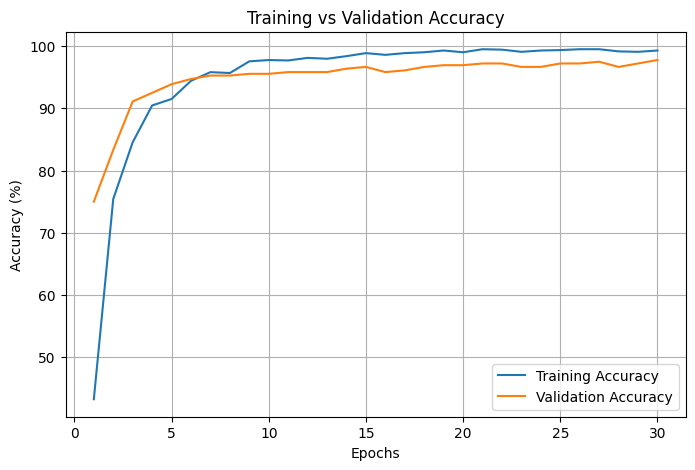

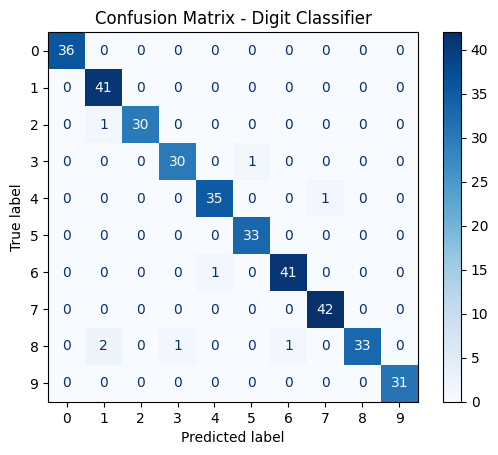

In [2]:

# DIGIT CLASSIFICATION (0–9)



import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


dataset = TensorDataset(X_tensor, y_tensor)


train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()

        self.fc1 = nn.Linear(64, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 10)

        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x


model = DigitClassifier()



criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



epochs = 30
train_acc_list = []
val_acc_list = []

for epoch in range(epochs):
    model.train()
    correct, total = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_accuracy = 100 * correct / total
    train_acc_list.append(train_accuracy)


    model.eval()
    with torch.no_grad():
        val_correct, val_total = 0, 0
        for X_val, y_val in val_loader:
            outputs_val = model(X_val)
            _, predicted_val = torch.max(outputs_val, 1)
            val_correct += (predicted_val == y_val).sum().item()
            val_total += y_val.size(0)
        val_accuracy = 100 * val_correct / val_total
        val_acc_list.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Acc: {train_accuracy:.2f}% | Val Acc: {val_accuracy:.2f}%")

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_acc_list, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

model.eval()
with torch.no_grad():
    all_preds = []
    all_labels = []
    for X_val, y_val in val_loader:
        outputs = model(X_val)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(y_val.numpy())


cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Digit Classifier")
plt.show()
